# DSS x IBM Datathon 11.8-11.9
Team: TRAP the Data

By: Rowan

Team Members: Tanvi, Pooja, Ashley, Dhruv

**Note:** EDA Summaries at the very end!

In [1]:
#import libraries
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

In [2]:
#download data
crimes = pd.read_csv("Berkeley_crime_2018.csv")

In [3]:
#seeing the data
crimes.head()

,CASENO,OFFENSE,CVLEGEND,BLKADDR,City,State,Day,Lat,Lon,timestamp
0,17076632,BURGLARY AUTO,BURGLARY - VEHICLE,1300 SAN PABLO AVE,Berkeley,CA,Monday,37.880262,-122.295809,2017-12-18 09:45:00
1,17092227,THEFT MISD. (UNDER $950),LARCENY,1600 SHATTUCK AVE,Berkeley,CA,Monday,37.878112,-122.269114,2017-10-30 10:25:00
2,18004102,BURGLARY COMMERCIAL,BURGLARY - COMMERCIAL,1400 SHATTUCK AVE,Berkeley,CA,Saturday,37.881957,-122.269551,2018-01-20 05:23:00
3,17065730,ALCOHOL OFFENSE,LIQUOR LAW VIOLATION,SOLANO AVENUE & COLUSA AVE,Berkeley,CA,Saturday,37.891368,-122.279257,2017-10-28 20:08:00
4,18000630,BURGLARY AUTO,BURGLARY - VEHICLE,800 POTTER ST,Berkeley,CA,Wednesday,37.851255,-122.292509,2018-01-03 19:00:00


In [4]:
#data descriptions
crimes.info(), crimes.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5030 entries, 0 to 5029
Data columns (total 10 columns):
CASENO       5030 non-null int64
OFFENSE      5030 non-null object
CVLEGEND     5030 non-null object
BLKADDR      5030 non-null object
City         5030 non-null object
State        5030 non-null object
Day          5030 non-null object
Lat          5030 non-null float64
Lon          5030 non-null float64
timestamp    5030 non-null object
dtypes: float64(2), int64(1), object(7)
memory usage: 393.0+ KB


(None,              CASENO          Lat          Lon
 count  5.030000e+03  5030.000000  5030.000000
 mean   1.727231e+07    37.868295  -122.276276
 std    3.916130e+05     0.010128     0.016120
 min    1.704742e+07    37.846196  -122.317566
 25%    1.706044e+07    37.862024  -122.289632
 50%    1.707292e+07    37.868346  -122.271133
 75%    1.709238e+07    37.873250  -122.265441
 max    1.809030e+07    37.905504  -122.221794)

In [5]:
crimes['CVLEGEND'].value_counts()

LARCENY                   1086
BURGLARY - VEHICLE         996
VANDALISM                  390
DISORDERLY CONDUCT         339
ASSAULT                    317
MOTOR VEHICLE THEFT        288
BURGLARY - RESIDENTIAL     281
DRUG VIOLATION             219
FRAUD                      218
ROBBERY                    173
LARCENY - FROM VEHICLE     121
LIQUOR LAW VIOLATION       113
BURGLARY - COMMERCIAL      108
FAMILY OFFENSE             101
SEX CRIME                   62
MISSING PERSON              58
WEAPONS OFFENSE             57
NOISE VIOLATION             39
ARSON                       30
RECOVERED VEHICLE           26
ALL OTHER OFFENSES           7
KIDNAPPING                   1
Name: CVLEGEND, dtype: int64

In [6]:
#types of offenses
crimes['OFFENSE'].value_counts()/len(crimes)

BURGLARY AUTO               0.198012
THEFT MISD. (UNDER $950)    0.160040
VANDALISM                   0.077535
DISTURBANCE                 0.067197
VEHICLE STOLEN              0.057256
BURGLARY RESIDENTIAL        0.055865
THEFT FELONY (OVER $950)    0.050497
ASSAULT/BATTERY MISD.       0.048111
NARCOTICS                   0.043539
ROBBERY                     0.034394
THEFT FROM AUTO             0.024056
ALCOHOL OFFENSE             0.022465
IDENTITY THEFT              0.022068
BURGLARY COMMERCIAL         0.021471
FRAUD/FORGERY               0.021272
DOMESTIC VIOLENCE           0.020080
ASSAULT/BATTERY FEL.        0.014911
MISSING ADULT               0.008946
2ND RESPONSE                0.007555
SEXUAL ASSAULT FEL.         0.007157
GUN/WEAPON                  0.006163
ARSON                       0.005964
THEFT FROM PERSON           0.005368
BRANDISHING                 0.005169
SEXUAL ASSAULT MISD.        0.005169
VEHICLE RECOVERED           0.005169
MISSING JUVENILE            0.002584
M

The top 5 crime types make up of about 55% all crimes (more than half).

## Exploratory Data Analysis (EDA)

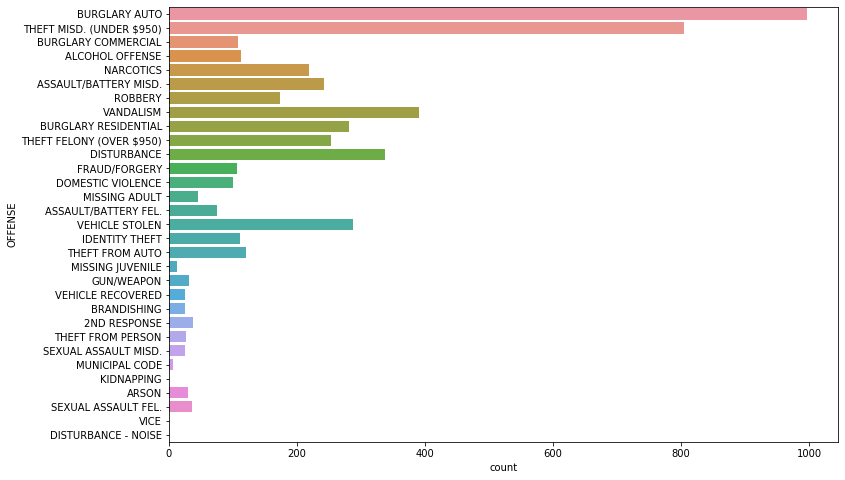

In [7]:
plt.figure(figsize =  (12,8))
plot1 = sns.countplot(data = crimes, y = 'OFFENSE')

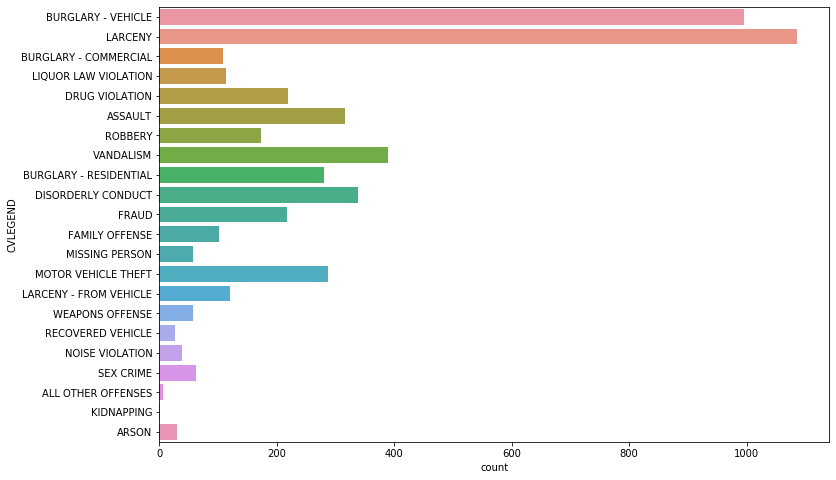

In [8]:
plt.figure(figsize =  (12,8))
plot1 = sns.countplot(data = crimes, y = 'CVLEGEND')

In [9]:
crimes['Day'].unique()

array(['Monday', 'Saturday', 'Wednesday', 'Sunday', 'Tuesday', 'Thursday',
       'Friday'], dtype=object)

Text(0.5, 1.0, 'Crime by Day of the Week')

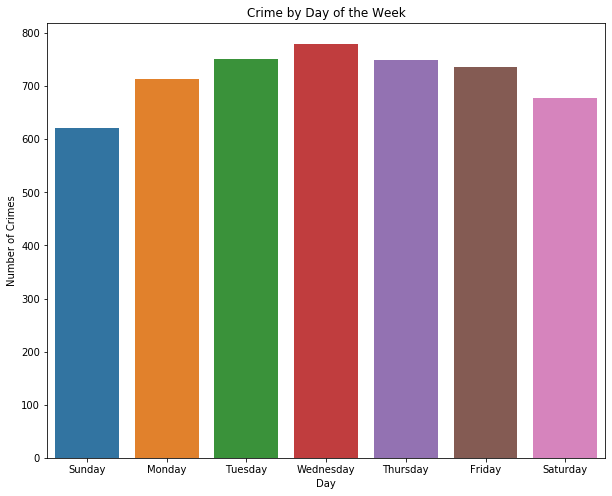

In [49]:
#proper order of days
days = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]
#plotting
plt.figure(figsize = (10,8))
crime_by_day = sns.countplot(data = crimes, x = 'Day', order = days)
plt.xlabel("Day")
plt.ylabel("Number of Crimes")
plt.title("Crime by Day of the Week")

In [11]:
len(crimes[crimes['Day'] == "Wednesday"])/len(crimes)

0.1550695825049702

**Observation:**

It seems like week days have more number of crimes than weekends, with Wednesday as the most.

In [12]:
#convert time to hour of the day
crimes['Hour'] = crimes['timestamp'].str.slice(start=11, stop = 13).astype('int')
#drop timestamp column
#crimes = crimes.drop(['timestamp'], axis = 1)

Text(0.5, 1.0, 'Crimes by Hour')

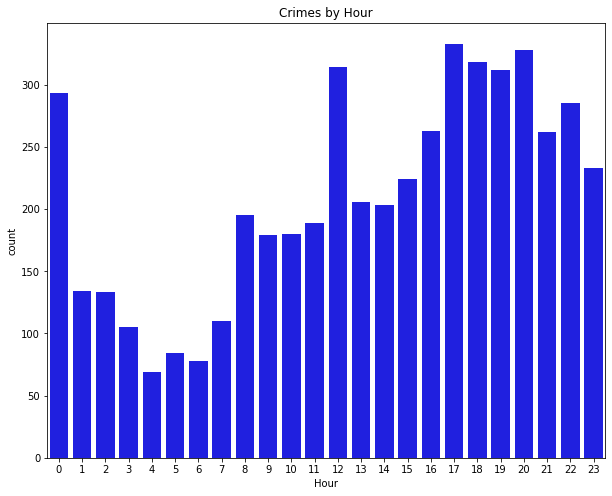

In [50]:
plt.figure(figsize = (10,8))
crime_by_hour = sns.countplot(crimes['Hour'], color = 'Blue')
plt.title('Crimes by Hour')

**Observation**

The most number of crimes occur during nighttime, also with a outlier peak at 12 PM noon.

**Next step**

We can see what types of crimes are common during which hours.

In [14]:
wednesday = crimes[crimes['Day'] == 'Wednesday']
wednesday.head()

,CASENO,OFFENSE,CVLEGEND,BLKADDR,City,State,Day,Lat,Lon,timestamp,Hour
4,18000630,BURGLARY AUTO,BURGLARY - VEHICLE,800 POTTER ST,Berkeley,CA,Wednesday,37.851255,-122.292509,2018-01-03 19:00:00,19
7,17092229,BURGLARY AUTO,BURGLARY - VEHICLE,1200 EUCLID AVE,Berkeley,CA,Wednesday,37.886740,-122.262299,2017-10-25 18:30:00,18
8,17072806,THEFT MISD. (UNDER $950),LARCENY,1100 GLEN AVE,Berkeley,CA,Wednesday,37.887747,-122.264514,2017-11-29 12:00:00,12
10,17092083,BURGLARY AUTO,BURGLARY - VEHICLE,1785 FOURTH ST,Berkeley,CA,Wednesday,37.870311,-122.300756,2017-10-18 19:00:00,19
14,17092385,VANDALISM,VANDALISM,2450 DURANT AVE,Berkeley,CA,Wednesday,37.867668,-122.260109,2017-11-29 18:45:00,18


In [15]:
wednesday['OFFENSE'].value_counts()/len(wednesday)

BURGLARY AUTO               0.225641
THEFT MISD. (UNDER $950)    0.160256
VANDALISM                   0.075641
BURGLARY RESIDENTIAL        0.069231
DISTURBANCE                 0.066667
THEFT FELONY (OVER $950)    0.053846
VEHICLE STOLEN              0.048718
ASSAULT/BATTERY MISD.       0.041026
NARCOTICS                   0.038462
ROBBERY                     0.034615
FRAUD/FORGERY               0.024359
IDENTITY THEFT              0.023077
THEFT FROM AUTO             0.021795
ALCOHOL OFFENSE             0.015385
BURGLARY COMMERCIAL         0.015385
MISSING ADULT               0.014103
ASSAULT/BATTERY FEL.        0.014103
DOMESTIC VIOLENCE           0.011538
THEFT FROM PERSON           0.010256
SEXUAL ASSAULT MISD.        0.006410
BRANDISHING                 0.006410
SEXUAL ASSAULT FEL.         0.006410
ARSON                       0.005128
GUN/WEAPON                  0.005128
VEHICLE RECOVERED           0.002564
2ND RESPONSE                0.001282
MUNICIPAL CODE              0.001282
K

Text(0.5, 1.0, 'Crimes by Hour on Wednesday')

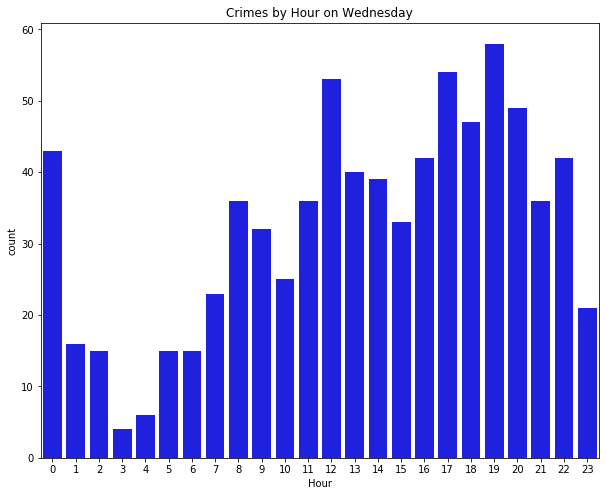

In [51]:
plt.figure(figsize = (10,8))
crime_by_hour = sns.countplot(wednesday['Hour'], color = 'Blue')
plt.title('Crimes by Hour on Wednesday')

In [17]:
wednesday_7pm = wednesday[wednesday['Hour']==19]
wednesday_7pm.head()

,CASENO,OFFENSE,CVLEGEND,BLKADDR,City,State,Day,Lat,Lon,timestamp,Hour
4,18000630,BURGLARY AUTO,BURGLARY - VEHICLE,800 POTTER ST,Berkeley,CA,Wednesday,37.851255,-122.292509,2018-01-03 19:00:00,19
10,17092083,BURGLARY AUTO,BURGLARY - VEHICLE,1785 FOURTH ST,Berkeley,CA,Wednesday,37.870311,-122.300756,2017-10-18 19:00:00,19
20,17068151,BURGLARY AUTO,BURGLARY - VEHICLE,2700 RUSSELL ST,Berkeley,CA,Wednesday,37.858518,-122.252653,2017-11-08 19:20:00,19
67,17068226,THEFT MISD. (UNDER $950),LARCENY,2000 ALLSTON WAY,Berkeley,CA,Wednesday,37.869096,-122.270137,2017-11-08 19:00:00,19
152,17078344,BURGLARY AUTO,BURGLARY - VEHICLE,100 SEAWALL DR,Berkeley,CA,Wednesday,37.863611,-122.317566,2017-12-27 19:00:00,19


In [18]:
wednesday_7pm['OFFENSE'].value_counts()

BURGLARY AUTO               25
THEFT MISD. (UNDER $950)    15
VEHICLE STOLEN               4
BURGLARY COMMERCIAL          3
ASSAULT/BATTERY MISD.        3
THEFT FELONY (OVER $950)     2
ALCOHOL OFFENSE              2
BURGLARY RESIDENTIAL         1
NARCOTICS                    1
DISTURBANCE                  1
VANDALISM                    1
Name: OFFENSE, dtype: int64

7 PM is the hour of the day on Wednesday with the higher number of crimes. Above are the common crimes during the 7pm hour.

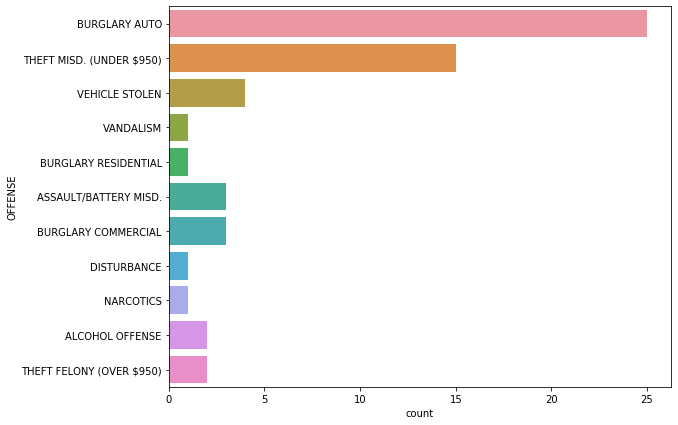

In [52]:
plt.figure(figsize= (9,7))
sns.countplot(data = wednesday_7pm, y = 'OFFENSE')

Do the crime types of a weekday resemble that of weekends? Let's see.

In [20]:
#around 13% of crimes happen on Saturdays
len(crimes[crimes['Day'] == "Saturday"])/len(crimes)

0.13479125248508947

In [44]:
#what about for all days? these are proportion of crimes by day
mon = len(crimes[crimes['Day'] == "Monday"])/len(crimes)
tues = len(crimes[crimes['Day'] == "Tuesday"])/len(crimes)
wed = len(crimes[crimes['Day'] == "Wednesday"])/len(crimes)
thurs = len(crimes[crimes['Day'] == "Thursday"])/len(crimes)
fri = len(crimes[crimes['Day'] == "Friday"])/len(crimes)
sat = len(crimes[crimes['Day'] == "Saturday"])/len(crimes)
sun = len(crimes[crimes['Day'] == "Sunday"])/len(crimes)

mon, tues, wed, thurs, fri, sat, sun

(0.141948310139165,
 0.1493041749502982,
 0.1550695825049702,
 0.1489065606361829,
 0.1463220675944334,
 0.13479125248508947,
 0.12365805168986084,
 1.0)

In [48]:
mon+tues+wed+thurs+fri+sat+sun
#reassuringly, the weights add up to 1. No problems here!

1.0

In [22]:
#what about per hour? These are the weights of crimes per day from 0 to 23
for i in np.arange(24):
    print(len(crimes[crimes['Hour'] == i])/len(crimes))

0.058250497017892644
0.026640159045725646
0.02644135188866799
0.020874751491053677
0.01371769383697813
0.016699801192842943
0.015506958250497018
0.02186878727634195
0.03876739562624255
0.03558648111332008
0.03578528827037773
0.03757455268389662
0.06242544731610338
0.04095427435387674
0.04035785288270378
0.044532803180914515
0.05228628230616302
0.06620278330019881
0.06322067594433399
0.062027833001988074
0.06520874751491054
0.05208747514910537
0.05666003976143141
0.0463220675944334


In [23]:
saturday = crimes[crimes['Day'] == 'Saturday']
saturday.head()

,CASENO,OFFENSE,CVLEGEND,BLKADDR,City,State,Day,Lat,Lon,timestamp,Hour
2,18004102,BURGLARY COMMERCIAL,BURGLARY - COMMERCIAL,1400 SHATTUCK AVE,Berkeley,CA,Saturday,37.881957,-122.269551,2018-01-20 05:23:00,5
3,17065730,ALCOHOL OFFENSE,LIQUOR LAW VIOLATION,SOLANO AVENUE & COLUSA AVE,Berkeley,CA,Saturday,37.891368,-122.279257,2017-10-28 20:08:00,20
22,17055890,BURGLARY AUTO,BURGLARY - VEHICLE,2300 DWIGHT WAY,Berkeley,CA,Saturday,37.864535,-122.262993,2017-09-16 01:00:00,1
31,18006916,DOMESTIC VIOLENCE,FAMILY OFFENSE,100 SEAWALL DR,Berkeley,CA,Saturday,37.863611,-122.317566,2018-02-03 12:00:00,12
38,17054317,NARCOTICS,DRUG VIOLATION,DWIGHT WAY & SIXTH ST,Berkeley,CA,Saturday,37.859979,-122.295077,2017-09-09 21:44:00,21


Text(0.5, 1.0, 'Crimes by Hour on Saturday')

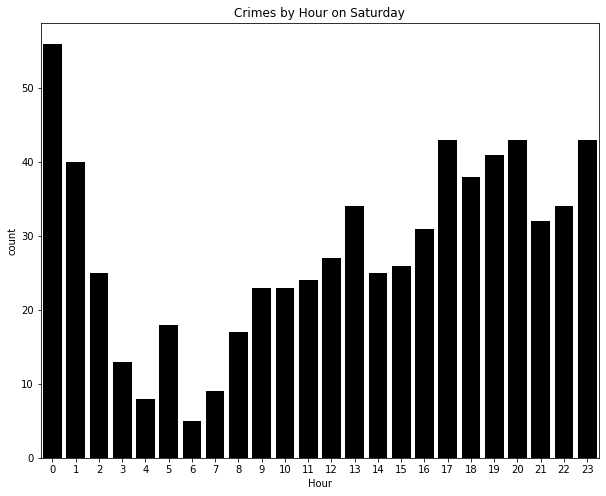

In [53]:
plt.figure(figsize = (10,8))
crime_by_hour = sns.countplot(saturday['Hour'], color = 'black')
plt.title('Crimes by Hour on Saturday')

Clearly, the distribution of crimes by hour on Weekend is different from wedneday.

In [25]:
saturday['OFFENSE'].value_counts()

BURGLARY AUTO               114
THEFT MISD. (UNDER $950)    108
VANDALISM                    55
NARCOTICS                    53
ASSAULT/BATTERY MISD.        41
THEFT FELONY (OVER $950)     40
BURGLARY RESIDENTIAL         37
DISTURBANCE                  33
VEHICLE STOLEN               33
2ND RESPONSE                 21
THEFT FROM AUTO              16
ROBBERY                      15
ALCOHOL OFFENSE              15
DOMESTIC VIOLENCE            15
ASSAULT/BATTERY FEL.         13
IDENTITY THEFT               12
BURGLARY COMMERCIAL          12
FRAUD/FORGERY                 8
GUN/WEAPON                    8
SEXUAL ASSAULT FEL.           8
MISSING ADULT                 5
SEXUAL ASSAULT MISD.          4
ARSON                         4
VEHICLE RECOVERED             3
MISSING JUVENILE              2
BRANDISHING                   2
DISTURBANCE - NOISE           1
Name: OFFENSE, dtype: int64

In [26]:
saturday_12am = saturday[saturday['Hour']==0]
saturday_12am.head()

,CASENO,OFFENSE,CVLEGEND,BLKADDR,City,State,Day,Lat,Lon,timestamp,Hour
72,17091668,BURGLARY AUTO,BURGLARY - VEHICLE,200 MARINA BLVD,Berkeley,CA,Saturday,37.868667,-122.313656,2017-08-19 00:00:00,0
239,18090130,VANDALISM,VANDALISM,2700 LE CONTE AVE,Berkeley,CA,Saturday,37.877388,-122.256872,2018-01-06 00:00:00,0
367,17078055,VEHICLE STOLEN,MOTOR VEHICLE THEFT,1300 VIRGINIA ST,Berkeley,CA,Saturday,37.874095,-122.288542,2017-12-23 00:00:00,0
525,17055810,DISTURBANCE,DISORDERLY CONDUCT,SHATTUCK AVENUE & ALLSTON WAY,Berkeley,CA,Saturday,37.869390,-122.267883,2017-09-16 00:55:00,0
769,17060266,THEFT MISD. (UNDER $950),LARCENY,2100 UNIVERSITY AVE,Berkeley,CA,Saturday,37.872175,-122.267835,2017-09-16 00:00:00,0


In [27]:
saturday_12am['OFFENSE'].value_counts()

BURGLARY AUTO               11
NARCOTICS                    9
2ND RESPONSE                 7
THEFT MISD. (UNDER $950)     4
ARSON                        3
SEXUAL ASSAULT FEL.          3
VEHICLE STOLEN               3
VANDALISM                    3
ASSAULT/BATTERY MISD.        3
ASSAULT/BATTERY FEL.         2
DISTURBANCE                  2
BURGLARY RESIDENTIAL         2
ROBBERY                      1
BURGLARY COMMERCIAL          1
GUN/WEAPON                   1
IDENTITY THEFT               1
Name: OFFENSE, dtype: int64

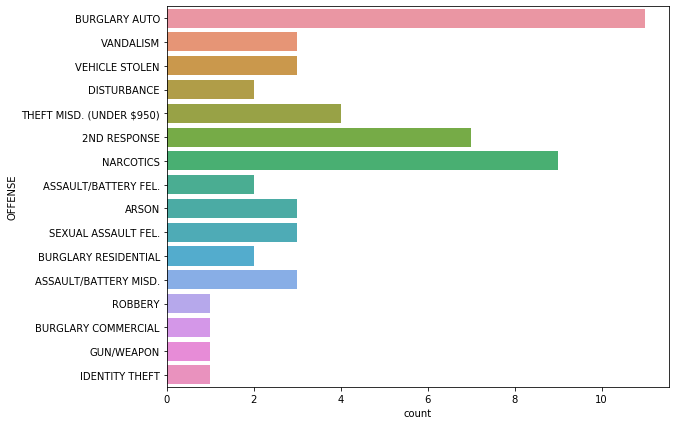

In [54]:
plt.figure(figsize = (9,7))
sns.countplot(data = saturday_12am, y = 'OFFENSE')

# Dummy Variables
Now, we will add dummy variables to see whether crimes on a holiday v. a non-holiday are different.

In [29]:
crime_date = [crimes['timestamp'][i][0:10] for i in range(len(crimes['timestamp']))]
crimes['Date'] = crime_date

In [30]:
import datetime
date = datetime.datetime.strptime(crimes['Date'][0], '%Y-%m-%d')
crimes.head()

,CASENO,OFFENSE,CVLEGEND,BLKADDR,City,State,Day,Lat,Lon,timestamp,Hour,Date
0,17076632,BURGLARY AUTO,BURGLARY - VEHICLE,1300 SAN PABLO AVE,Berkeley,CA,Monday,37.880262,-122.295809,2017-12-18 09:45:00,9,2017-12-18
1,17092227,THEFT MISD. (UNDER $950),LARCENY,1600 SHATTUCK AVE,Berkeley,CA,Monday,37.878112,-122.269114,2017-10-30 10:25:00,10,2017-10-30
2,18004102,BURGLARY COMMERCIAL,BURGLARY - COMMERCIAL,1400 SHATTUCK AVE,Berkeley,CA,Saturday,37.881957,-122.269551,2018-01-20 05:23:00,5,2018-01-20
3,17065730,ALCOHOL OFFENSE,LIQUOR LAW VIOLATION,SOLANO AVENUE & COLUSA AVE,Berkeley,CA,Saturday,37.891368,-122.279257,2017-10-28 20:08:00,20,2017-10-28
4,18000630,BURGLARY AUTO,BURGLARY - VEHICLE,800 POTTER ST,Berkeley,CA,Wednesday,37.851255,-122.292509,2018-01-03 19:00:00,19,2018-01-03


In [31]:
unique_days = crimes['Date'].unique()
unique_days

array(['2017-12-18', '2017-10-30', '2018-01-20', '2017-10-28',
       '2018-01-03', '2017-10-22', '2017-08-15', '2017-10-25',
       '2017-11-29', '2017-09-14', '2017-10-18', '2018-01-25',
       '2017-10-24', '2017-10-15', '2017-10-02', '2017-09-01',
       '2018-01-21', '2017-12-20', '2017-11-09', '2017-11-08',
       '2017-09-16', '2017-09-15', '2017-12-11', '2018-01-19',
       '2018-01-29', '2017-08-22', '2017-08-29', '2018-01-04',
       '2018-02-03', '2017-10-26', '2017-10-11', '2017-08-13',
       '2017-09-09', '2017-10-10', '2017-10-13', '2017-11-14',
       '2017-09-24', '2017-09-12', '2017-10-12', '2017-10-08',
       '2017-12-31', '2017-09-19', '2017-09-17', '2017-09-28',
       '2018-02-04', '2017-09-20', '2017-08-21', '2017-08-27',
       '2017-09-22', '2018-01-12', '2017-12-22', '2017-11-13',
       '2017-10-21', '2017-12-06', '2018-02-06', '2017-12-25',
       '2017-08-19', '2017-10-29', '2017-09-08', '2017-10-20',
       '2017-08-24', '2017-12-13', '2017-09-21', '2018-

In [32]:
# there are 179 unique days in total. Note: There are only 180 total days in a school year.
len(unique_days)

179

In [33]:
holidays = ['2017-09-04', '2017-11-10', '2017-11-22',
        '2017-11-23', '2017-11-24', '2017-12-16', '2017-12-17', 
        '2017-12-18', '2017-12-19', '2017-12-20', '2017-12-21',
        '2017-12-22', '2017-12-23', '2017-12-24', '2017-12-25',
        '2017-12-26', '2017-12-27', '2017-12-28', '2017-12-29',
        '2017-12-30', '2017-12-31', '2018-01-01', '2018-01-02',
        '2018-01-03', '2018-01-04', '2018-01-05', '2018-01-06',
        '2018-01-07', '2018-01-08', '2018-01-09', '2018-01-10',
        '2018-01-11', '2018-01-12', '2018-01-13', '2018-01-14',
        '2018-01-15', '2018-01-15', '2018-02-19', '2018-03-26', 
        '2018-03-27', '2018-03-28', '2018-03-29',
        '2018-03-30']

In [34]:
dummy_holiday = [1 if i in holidays else 0 for i in crimes['Date']]

In [35]:
#holidays are 24 percent of all unique days in the data.
len(holidays)/len(unique_days)

0.24022346368715083

In [36]:
crimes['Holiday'] = dummy_holiday
crimes[['Holiday']].head()

,Holiday
0,1
1,0
2,0
3,0
4,1


In [37]:
# approximately 16% of crimes happen on University Holidays
crimes[crimes['Holiday']==1]['Holiday'].value_counts()/len(crimes)

1    0.176342
Name: Holiday, dtype: float64

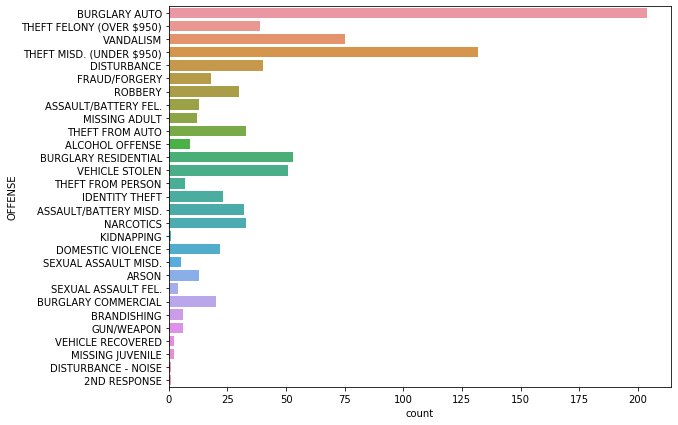

In [55]:
holiday_crimes = crimes[crimes['Holiday']==1]
non_holiday_crimes = crimes[crimes['Holiday']==0]
plt.figure(figsize = (9,7))
sns.countplot(data = holiday_crimes, y = 'OFFENSE')

In [39]:
holiday_offenses = holiday_crimes['OFFENSE'].value_counts().sort_values(ascending = False)
holiday_offenses/len(holiday_crimes)

BURGLARY AUTO               0.229989
THEFT MISD. (UNDER $950)    0.148816
VANDALISM                   0.084555
BURGLARY RESIDENTIAL        0.059752
VEHICLE STOLEN              0.057497
DISTURBANCE                 0.045096
THEFT FELONY (OVER $950)    0.043968
THEFT FROM AUTO             0.037204
NARCOTICS                   0.037204
ASSAULT/BATTERY MISD.       0.036077
ROBBERY                     0.033822
IDENTITY THEFT              0.025930
DOMESTIC VIOLENCE           0.024803
BURGLARY COMMERCIAL         0.022548
FRAUD/FORGERY               0.020293
ASSAULT/BATTERY FEL.        0.014656
ARSON                       0.014656
MISSING ADULT               0.013529
ALCOHOL OFFENSE             0.010147
THEFT FROM PERSON           0.007892
BRANDISHING                 0.006764
GUN/WEAPON                  0.006764
SEXUAL ASSAULT MISD.        0.005637
SEXUAL ASSAULT FEL.         0.004510
MISSING JUVENILE            0.002255
VEHICLE RECOVERED           0.002255
KIDNAPPING                  0.001127
D

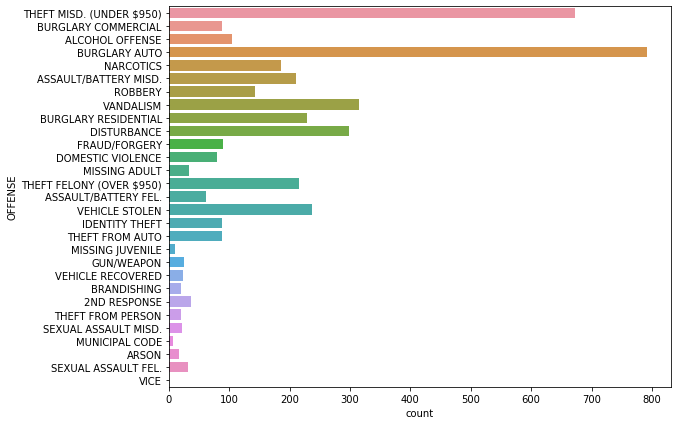

In [56]:
plt.figure(figsize = (9,7))
sns.countplot(data = non_holiday_crimes, y = 'OFFENSE')

In [41]:
non_holiday_offenses = non_holiday_crimes['OFFENSE'].value_counts().sort_values(ascending = False)
non_holiday_offenses/len(non_holiday_crimes)

BURGLARY AUTO               0.191166
THEFT MISD. (UNDER $950)    0.162443
VANDALISM                   0.076032
DISTURBANCE                 0.071929
VEHICLE STOLEN              0.057205
BURGLARY RESIDENTIAL        0.055033
THEFT FELONY (OVER $950)    0.051895
ASSAULT/BATTERY MISD.       0.050688
NARCOTICS                   0.044895
ROBBERY                     0.034516
ALCOHOL OFFENSE             0.025103
FRAUD/FORGERY               0.021482
BURGLARY COMMERCIAL         0.021241
THEFT FROM AUTO             0.021241
IDENTITY THEFT              0.021241
DOMESTIC VIOLENCE           0.019068
ASSAULT/BATTERY FEL.        0.014965
2ND RESPONSE                0.008931
MISSING ADULT               0.007965
SEXUAL ASSAULT FEL.         0.007724
GUN/WEAPON                  0.006034
VEHICLE RECOVERED           0.005793
SEXUAL ASSAULT MISD.        0.005069
BRANDISHING                 0.004827
THEFT FROM PERSON           0.004827
ARSON                       0.004103
MISSING JUVENILE            0.002655
M

**The top 5 crimes (BY PROPORTION) for holidays are:**
1. Burglary Auto
2. Theft MISD
3. Alcohol Offense
4. Burglary residential
5. Vehicle Stolen
6. Disturbance
7. Theft Felony

**The top 5 crimes for non-holidays are:**
1. Burglary auto (same)
2. Theft Misd (same)
3. Vandalism
4. Disturbance
5. Vehicle Stolen
6. Burglary residential
7. Theft Felony (same)

Text(0.5, 1.0, 'Crimes by Hour on Holidays')

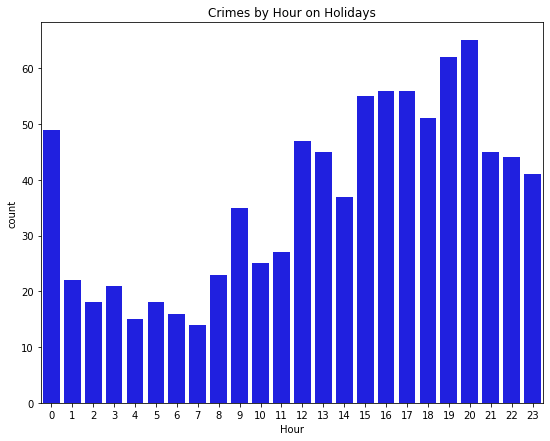

In [57]:
plt.figure(figsize = (9,7))
crime_by_holiday = sns.countplot(holiday_crimes["Hour"], color = 'Blue')
plt.title('Crimes by Hour on Holidays')

Text(0.5, 1.0, 'Crimes by Hour on Non-Holidays')

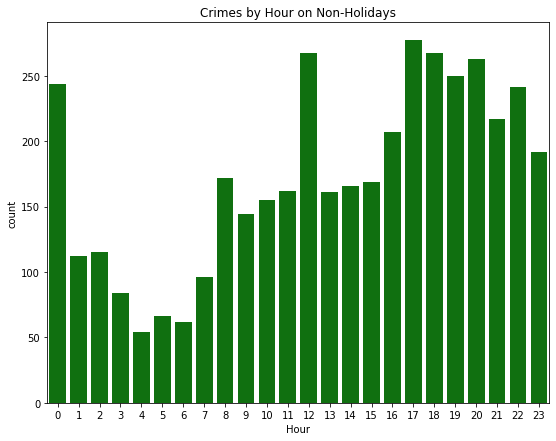

In [58]:
plt.figure(figsize = (9,7))
crime_by_holiday = sns.countplot(non_holiday_crimes["Hour"], color = 'Green')
plt.title('Crimes by Hour on Non-Holidays')

As can be seen, the distribution of crimes by hour are very similar, with most crimes happening at late afternoon and night.

# EDA: Summary of Findings

Throughout our EDA, we looked for differences in crimes and crime rate by the "OFFENSE" feature as well as the distribution of crimes throughout the hours of the day.

* The most common crime types overall (regardless of conditions like holiday) are: Burglary, Theft Misdimeanor, Vandalism, Disturbance, Vehicle Stolen, making up around 55% of all crimes.

* Our second finding is that more crimes happen during (every) weekdays than (any) weekends. The most common day for crime is Wednesday (hump day!)

* The distribution of crime on a weekday like Wedneday and  a weekend day like saturday are drastically different. Most crimes occur in late afternoon and early evening for Wednesday while on Saturday more crimes happen are 12 AM and early early morning than the former.

Next, we created new dummary variables that has value 1 if the day is a University Holiday and 0 otherwise. Here are some of our findings.

* Around 16% of all crimes happen on holidays while the number of university holidays in a year is only 24% of all unique dates (only 179 days) on the data set. This suggests that holidays has disproportionately less crimes than non-holidays.
* The distribution of crimes by hour on holidays vs. non-holidays are very similar: Left skewed distribution with an outlier at midnight.
* The top two crimes for holidays and non-holidays are the same: Burglary auto and theft misdemeanor. Vehicle stolen ranks #5 for both. Alcohol offense is number 3 for holidays but does not appear in top 7 for non-holidays. Vandalism is #3 for non-holidays but does not appear in top 7 for holidays.